# PA 2.6: 3-Way Split

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.6. Due: complete this PA prior to class on Friday, Dec 20, 2024.*

## Overview

In this assignment you need to implement an algorithm that takes a dataset and splits it (randomly) into 3 parts for use in a machine learning application: one set for training, validation, and testing. This operation is necessary to set up, validate and improve the model you have implemented.

To accomplish this we will load a dataset with `pandas` (just like last week) and learn a bit about random number generation. There is also a task which will illustrate how you can use `assert` statements (review).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1: Load the Data

We first need to load the data and ensure that these are properly stored in specific arrays. The file we use in this assignment is *data.csv*. It contains five columns and 100 entries for each of the columns. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b> 

Use the <code>pandas</code> library to load data from the file named *data.csv* and ensure that your dataset includes both input variables (X1, X2, X3) and an output variable (target Y).
</p>
</div>

<div style="background-color:#C8FFFF; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Hint:</b>   

If you load the *data.csv* file you see that the first column is the index of the data and therefore you don't want to load it. Check [this page](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for the key argument you need to specify to load only X1, X2, X3, and Y. 
</p>
</div>

In [2]:
# data = YOUR_CODE_HERE

# Solution:
data = pd.read_csv('data.csv', usecols=[1, 2, 3, 4])

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b> 

Show the summary of the data as you have seen in previous week *PA13*.
</p>
</div>

In [3]:
# YOUR_CODE_HERE

# Solution:
data.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.00000
mean,0.470300,0.498200,0.517900,1.95180
std,0.297432,0.293383,0.292986,1.26048
min,0.010000,0.010000,0.010000,-0.51000
25%,0.195000,0.240000,0.277500,1.04000
50%,0.465000,0.505000,0.565000,1.96000
75%,0.730000,0.765000,0.755000,2.80000
max,0.990000,0.990000,0.990000,5.38000


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.3:</b> 

After loading the data, separate it into two arrays: <code>X</code> for input variables and <code>Y</code> for the output variable. The input variables are typically all columns except the target variable.
</p>
</div>

In [4]:
# X = YOUR_CODE_HERE
# Y = YOUR_CODE_HERE

# Solution:
X = np.array(data[['X1', 'X2', 'X3']])
Y = np.array(data['Y'])

## Task 2: Randomly Shuffle Data

It is important to split the data such that they are randomly distributed across the train, validation, and test sets. This is easily carried out in Python with the Numpy package; the default random number generator and its methods are briefly introduced here.

### Random Number Generator

Although randomness occurs everywhere in nature (remember _aleatory_ uncertainty from Q1?), it is a surprisingly complex thing to accomplish with a computer:

> With the advent of computers, programmers recognized the need for a means of introducing randomness into a computer program. However, surprising as it may seem, it is difficult to get a computer to do something by chance. A computer follows its instructions blindly and is therefore completely predictable. (A computer that doesn't follow its instructions in this manner is broken.)

_Source: [random.org/randomness/](https://www.random.org/randomness/)_

Fortunately most modern software provides a random number generator. The best generator in Python for our purposes is part of the Numpy package, primarily because it can be used seamlessly with ndarrays. It is implemented as part of the module `random` [(documentation page here)](https://numpy.org/doc/stable/reference/random/index.html), where typical usage is as follows:

1. Create a random number generator by initializing an instance of the `Generator` class with the method `np.random.default_rng`
2. Use one of the numerous methods of this class to generate random samples

_Note that you may find some examples of random number generation that uses_ `np.random.seed`_; this has been sperceded in Numpy by_ `np.random.Generator`.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.1:</b>   

Run the cell below to: 1) create a random number generator and then 2) use it to generate a random number between 0 and 1.
</p>
</div>

In [5]:
rng = np.random.default_rng()
print(type(rng))
rng.random()

<class 'numpy.random._generator.Generator'>


0.6344871945894758

The random number generator has many methods that are useful. You can read more about it [here](https://numpy.org/doc/stable/reference/random/generator.html), but of course the documentation has a lot of computer-science-y stuff. Below are a few examples of what you can do with it.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.2:</b>   

Explore the methods of the class by changing the code in the cell below. In addition, run the cell repeatedly to see how the randomly generated numbers change each time.
</p>
</div>

In [6]:
print('integers:', rng.integers(5))
print('random:', rng.random(5))
print('choice:', rng.choice(np.array(5)))
print('bytes:', rng.bytes(5))

integers: 4
random: [0.57967807 0.57754065 0.2093782  0.54105167 0.84697294]
choice: 1
bytes: b'c\x16\x1c\x94\x9f'


### Reproducible Randomness

Working with randomness can make debugging code difficult. Fortunately, we can take advantage of the fact that computers can't truly create randomness by making the "randomness" occur consistently every time we use it (in other words: make it completely predictable!). To accomplish this, we can set a _seed_ value; if we know the seed of a random number generator, we can completely predict the sequence of "randomness" that it will produce.

_In the next cell we set the seed of the default random number generator in <code>numpy</code> to **14**: this allows us to reproduce the "randomness" of the random number generator when we shuffle the data later. It is important in this assignment to allow us to check that you did the assignment correctly. If you wish to know more, try reading [this page](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do)._

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.3:</b>   

Run the cell below repeatedly to see how the randomly generated numbers change each time. Do you understand what has happened and why?
</p>
</div>

In [7]:
rng = np.random.default_rng(seed=14)
print('integers:', rng.integers(5))
print('random:', rng.random(5))
print('choice:', rng.choice(np.array(5)))
print('bytes:', rng.bytes(5))

integers: 0
random: [0.36094667 0.70273931 0.86011879 0.64131748 0.54836321]
choice: 4
bytes: b'\x03\x1e\xc4\x12\xf3'


Now we know enough about random number generators to apply it to our machine learning data splitting case.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.4:</b>   

Create an array that contains a random permutation of indices of an array of length using <code>np.random.Generator.permutation</code>.

<em>Hint: check the documentation page linked above and use the object <code>rng</code> in the same way as illustrated in previous tasks.</em>
</p>
</div>

In [8]:
# rng = np.random.default_rng(seed=14)
test_array_length = 5
test_array = rng.integers(low=100, high=200, size=test_array_length)

# random_indices = YOUR_CODE_HERE
# Solution
random_indices = rng.permutation(test_array_length)

print('The randomized indices are:', random_indices)
print('The randomized array becomes:', test_array[random_indices])

The randomized indices are: [2 3 0 4 1]
The randomized array becomes: [176 146 109 179 171]


## Task 3: Implement Data Splitting

Now that the data is loaded and we know how to shuffle it, you need to split the datasets into a training, validation and testing dataset. First we will write a function, then apply it.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.1:</b>   

Implement a function to create six arrays: <code>X_train</code>, <code>X_val</code>, <code>X_test</code>, <code>Y_train</code>, <code>Y_val</code>, and <code>Y_test</code>. Read the docstring to ensure it is set up correctly.
</p>
</div>

<div style="background-color:#C8FFFF; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Hint:</b>   

Use the code from previous tasks to randomly access the data from the <code>X</code> and <code>Y</code> arrays.
</p>
</div>

<div style="background-color:#FFD700; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Use Asserts!</b>   
    
The `split_data` function below can fail in certain cases, such as when: the input arrays are not the same length, the proportions don't add up to 1 or there aren't 3 proportions. Additionally if the implementation has a small error, such as an off-by-one indexing bug, code can break later down the line. These requirements for the function to work correctly can be called its "contract" - a set of conditions it should satisfy. In some programming languages these contracts are built in through concepts such as static type checking (you don't need to worry about this though), but we don't have that luxury in Python. Instead, you can use <a href="https://realpython.com/python-assert-statement/" target="_blank"><code>assert</code> statements</a>  as a way to enforce conditions on your code. For this, you can try adding a contract to `split_data` through pre-conditions and post-conditions. Pre-conditions check the data coming in satisfies the contract and post-conditions check that the data coming out satisfies the contract. Use asserts to do this, and check the following conditions:
<ol>
    <li> `X` and `Y` are the same length. </li>
    <li> `proportions` has length 3. </li>
    <li> The values in `proportions` add up to 1. </li>
    <li> The lengths of `X_train`, `X_val` and `X_test` added together are equal to the length of `X` (we don't need to check this for `Y` due to the condition 1, but it never hurts to do so).
</ol>
You can also see that these conditions are actually described in the docstring of `split_data`!

To implement this task, uncomment the 4 lines below with assert statements and add the appropriate condition, as described by the string. Note the simple form of an assert statement: `assert expression[, assertion_message]`.

Your task is to fill in the `expression`! You can test this out by using the function in a way that violates the contract (once implemented), which will result in the `assertion_message`.

</p>
</div>

In [9]:
def split_data(X, Y, proportions):
    """Split input and output into 3 subsets for ML model.

    Arguments
    =========
    X, Y:        ndarrays where rows are number of observations
                    (both arrays have identical number of rows)
    proportions: list with decimal fraction of original data defining
                 allocation into three parts (train, validate, test sets,
                 respectively). The list is len(proportions)=3, and
                 contains floats that should sum to 1.0.

    Returns
    =======
    X_train, X_val, X_test, Y_train, Y_val, Y_test:
     6 ndarrays (3 splits each for input and output), where the number of
     columns corresponds to the original input and output (respectively)
     and the sum of the number of rows is equal to the rows of the original
     input/output.
    """
    # assert YOUR_CODE_HERE, "Contract broken: 3 proportions must be provided"
    # assert YOUR_CODE_HERE, "Contract broken: sum of proportions should be one"
    # assert YOUR_CODE_HERE, "Contract broken: X and Y arrays must have same dimensions"
    # Solution:
    assert len(proportions) == 3, "Contract broken: 3 proportions must be provided"
    assert sum(proportions) == 1, "Contract broken: sum of proportions should be one"
    assert len(X) == len(Y), "Contract broken: X and Y arrays must have same dimensions"

    # Do not modify this line:
    np.random.default_rng(seed=42)

    # Shuffle data using random permutation of indices 
    # indices = YOUR_CODE_HERE
    # Solution
    indices = np.random.permutation(len(X))

    # Create shuffled training, validation and test sets
    # YOUR_CODE_HERE # way more than one line!

    # assert YOUR_CODE_HERE, "Contract broken: generated datasets don't have same accumulated length as original"

    # Solution

    train_prop = proportions[0]
    val_prop = proportions[1]
    
    train_end = int(train_prop*len(X))
    val_end = int(val_prop*len(X)) + train_end
    
    X_train, X_val, X_test = (X[indices[:train_end]],
                              X[indices[train_end:val_end]],
                              X[indices[val_end:]])
    Y_train, Y_val, Y_test = (Y[indices[:train_end]],
                              Y[indices[train_end:val_end]],
                              Y[indices[val_end:]])
    
    assert (len(X_train) + len(X_val) + len(X_test)) == len(X), "Contract broken: generated datasets don't have same accumulated length as original"
    # END Solution block
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.2:</b>   

Use your function to split the arrays <code>X</code> and <code>Y</code> from Task 1 into training, validation, and test sets. The split proportions should be **70%** for training, **10%** for validation, and **20%** for the test dataset.
</p>
</div>

In [10]:
# split_proportions = YOUR_CODE_HERE
# (X_train, X_val, X_test,
#  Y_train, Y_val, Y_test) = split_data(YOUR_CODE_HERE)

# Solution:
split_proportions = [0.7, 0.1, 0.2]
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = split_data(X, Y, split_proportions)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 3.3:</b>   

Run the cell below to check whether or not you have implemented the function correctly. The output will present a string output summarizing the number of data allocated to each set, whereas the figure will use colors to illustrate whether or not the values were shuffled in a random way.
</p>
</div>

The number of data in each set is:
       training: 70
     validation: 10
        testing: 20
  none of above: 0


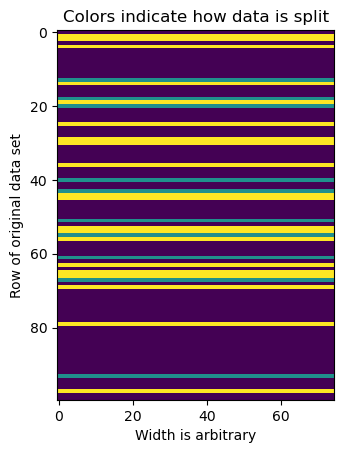

In [11]:
def plot_allocation(X, Y,
                    X_train, X_val, X_test,
                    Y_train, Y_val, Y_test):

    set_of_X_and_Y = np.hstack((X,Y.reshape((100,1))))
    # use many (arbitrary) columns to make plot wider
    which_set_am_i = np.zeros((len(Y), 75))
    
    for i in range(len(X_train)):
        matching_rows = np.all(X==X_train[i], axis=1)
        which_set_am_i[np.where(matching_rows)[0],:] = 1
    for i in range(len(X_val)):
        matching_rows = np.all(X==X_val[i], axis=1)
        which_set_am_i[np.where(matching_rows)[0],:] = 2

    for i in range(len(X_test)):
        matching_rows = np.all(X==X_test[i], axis=1)
        which_set_am_i[np.where(matching_rows)[0],:] = 3
        
    fig, ax = plt.subplots()
    ax.imshow(which_set_am_i)

    ax.set_title('Colors indicate how data is split')
    ax.set_xlabel('Width is arbitrary')
    ax.set_ylabel('Row of original data set')
    
    print('The number of data in each set is:')
    print(f'       training: {sum(which_set_am_i[:,0]==1)}')
    print(f'     validation: {sum(which_set_am_i[:,0]==2)}')
    print(f'        testing: {sum(which_set_am_i[:,0]==3)}')
    print(f'  none of above: {sum(which_set_am_i[:,0]==0)}')

plot_allocation(X, Y,
                X_train, X_val, X_test,
                Y_train, Y_val, Y_test)

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->